This simulates the game of life, which consists of an array (board) of cells which can be alive or dead.  They evolve at discrete timesteps according to the following rules:
1. any live cell with fewer than two live neighbours dies (underpopulation)
2. any live cell with two or three live neighbours lives
3. any live cell with more than three live neighbours dies (overpopulation)
4. any dead cell with exactly three live neighbours becomes live (reproduction)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
def new_board(board_size):
    '''
    Set up a new, empty board
    '''
    return np.zeros(board_size)

In [3]:
def glider_board(board_size):
    '''
    Set up an example board with a glider on it
    '''
    board = new_board(board_size)
    board[5,5] = 1
    board[5,6] = 1
    board[5,7] = 1
    board[4,7] = 1
    board[3,6] = 1
    return board

In [4]:
def random_board(board_size,p):
    '''
    Set up a random board where a cell is alive with probability p
    '''
    random_cells = np.random.rand(board_size[0],board_size[1])
    board = new_board(board_size)
    board[random_cells > 1-p] = 1
    return board

In [5]:
def plot_board(board):
    ''' 
    Plot a board with white alive and black dead
    '''
    img = plt.imshow(board,cmap='gray')
    return img

In [6]:
def get_cell(board,row,col):
    '''
    Return the value of the cell at (row,col) in board, modulo the size of the board
    '''
    return board[row % board.shape[0],col % board.shape[1]]

In [7]:
def set_cell(board,row,col,value):
    '''
    Assign the given value to the cell at (row,col) in board, modulo the size of the board
    '''
    board[row % board.shape[0],col % board.shape[1]] = value
    return board

In [8]:
def count_neighbours(board,row,col):
    '''
    Count the number of alive neighbours of cell at (row,col), with periodic boundary conditions
    (implemented through get_cell)
    '''
    return(  get_cell(board,row-1,col-1) + get_cell(board,row-1,col) + get_cell(board,row-1,col+1)
           + get_cell(board,row,col-1)                               + get_cell(board,row,col+1)
           + get_cell(board,row+1,col-1) + get_cell(board,row+1,col) + get_cell(board,row+1,col+1))

In [9]:
from scipy.signal import convolve2d

def count_neighbours_conv(board):
    '''
    Count the number of alive neighbours of each cell, with periodic boundary conditions.
    neighbours is the same size as board
    This is a fancy way with a convolution
    '''
    kernel = np.array(
        [[1., 1., 1.],
         [1., 0., 1.],
         [1., 1., 1.]]
    )
    neighbours = convolve2d(board, kernel, mode='same', boundary="wrap")
    return neighbours

In [10]:
def step(board):
    '''
    Creates the next iteration from a given board
    '''
    
    # create an empty board to store the new result in
    next_board = new_board(board.shape)
    
    # loop over each row and column
    for row in range(0, board.shape[0]):
        for col in range(0, board.shape[1]):
            
            # determine the number of neighbours
            num_neighbours = count_neighbours(board, row, col)

            # determine if the cell is alive
            is_alive = get_cell(board, row, col) == 1
            
            # apply the rules
            # EXERCISE: reduce this to the fewest possible computations
            # Bear in mind that next_board starts off as all zeros
            if num_neighbours < 2 and is_alive:
                set_cell(next_board, row, col, 0)
            elif 2 <= num_neighbours <= 3 and is_alive:
                set_cell(next_board, row, col, 1)
            elif num_neighbours > 3 and is_alive:
                set_cell(next_board, row, col, 0)
            elif num_neighbours == 3 and not is_alive:
                set_cell(next_board, row, col, 1)
            else:
                set_cell(next_board, row, col, 0)
                
    return next_board

In [11]:
def step_conv(board):
    '''
    Creates the next iteration from a given board
    This is a fancy way with a convolution
    '''
    # create an empty board to store the result in
    next_board = new_board(board.shape)
    
    # compute the number of neighbours for each cell
    num_neighbours = count_neighbours_conv(board)

    # determine if cells are alive or dead
    is_alive = board == 1.0
    is_dead = board == 0.0
    
    # compute masks for each of the four interesting cases
    isolated_mask = np.logical_and((num_neighbours < 2), is_alive)
    two_or_three = np.logical_or(num_neighbours == 2.0, num_neighbours == 3.0)
    live_mask = np.logical_and(two_or_three, is_alive)
    overcrowded_mask = np.logical_and((num_neighbours > 3), is_alive)
    grow_mask = np.logical_and((num_neighbours == 3), is_dead)

    # apply the results on the masks
    # note that the ones that set the value to zero don't actually do anything
    next_board[isolated_mask] = 0
    next_board[live_mask] = 1
    next_board[overcrowded_mask] = 0
    next_board[grow_mask] = 1

    return next_board

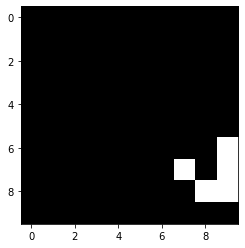

In [17]:
# Test with a glider example with the standard code
n_steps = 10

board = glider_board([10,10])
fig, ax = plt.subplots()
img = plot_board(board)

for i_step in range(n_steps):
    board = step(board)
    img.set_array(board)
    plt.pause(0.1)
    clear_output(wait=True)
    display(fig)

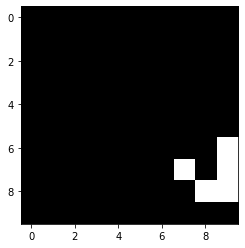

In [13]:
# Test with a glider example with the convolution code
n_steps = 10

board = glider_board([10,10])
fig, ax = plt.subplots()
img = plot_board(board)

for i_step in range(n_steps):
    board = step_conv(board)
    img.set_array(board)
    plt.pause(0.1)
    clear_output(wait=True)
    display(fig)

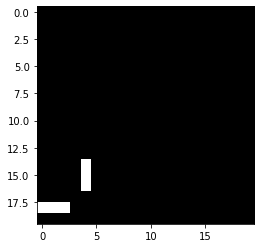

In [18]:
# see what happens with a random board
n_steps = 100

board = random_board([20,20],0.2)
fig, ax = plt.subplots()
img = plot_board(board)

for i_step in range(n_steps):
    board = step(board)
    img.set_array(board)
    plt.pause(0.1)
    clear_output(wait=True)
    display(fig)